<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/BalanceHidrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

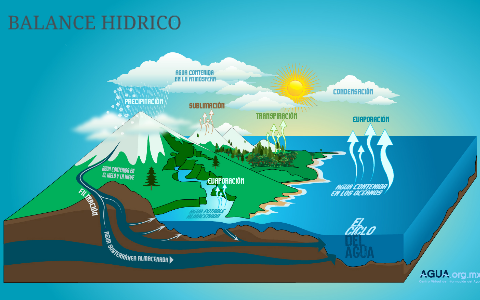

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
archivo = 'C:/Users/Documents/ejemplo.xlsx'
df = pd.read_excel("ZonasRecarga_Ejercicio.xlsx",sheet_name='Hoja2' , engine='openpyxl')
df.describe()

,Año,P (mm),Q (mm/mes),EVA Po (mm)
count,24.000000,24.000000,24.000000,24.000000
mean,2008.750000,145.283333,16.169583,106.512500
std,0.675664,78.871451,22.891728,21.631284
min,2008.000000,25.900000,0.000000,74.400000
25%,2008.000000,77.150000,0.747500,93.825000
50%,2009.000000,150.350000,4.160000,102.150000
75%,2009.000000,202.950000,27.695000,116.125000
max,2010.000000,312.000000,87.630000,155.600000


In [3]:
df

,Año,Resumen meses,P (mm),Q (mm/mes),EVA Po (mm)
0,2008,Abril,202.9,44.54,113.2
1,2008,Mayo,312.0,87.63,103.2
2,2008,Junio,205.6,25.12,107.4
3,2008,Julio,203.1,27.55,109.7
4,2008,Agosto,272.9,62.91,101.1
5,2008,Septiembre,175.8,16.38,116.2
6,2008,Octubre,260.0,35.79,94.0
7,2008,Noviembre,169.5,1.26,74.6
8,2008,Diciembre,37.5,0.87,100.0
9,2009,Enero,70.4,0.33,92.3


In [4]:
puntomarchites = float(input("Digite el valor de punto de marchites "))
capacidad_de_campo = float(input("Digite el valor de la capacidad de campo "))
data = df.iloc[1,3]
rows = len(df.axes[0])
cols = len(df.axes[1])
pq = 0
q=0
año = ""
evtapo =0
evtr =0
arreglo =[]
data=[]
humedad_suelo = 0
humedad_anterior = 0
humedad_auxiliar =0
columnas =['Año','Meses','P (mm)', 'Q (mm/mes','EVA_Po', 'P_Q','EVTR','I','HS','R']
for i in range(rows):
    lista = []
    año  = df.iloc[i,0]     #Se  lee la año
    meses = df.iloc[i,1]    #Se lee meses
    p = df.iloc[i,2]        #Se lee la precipitación
    q = df.iloc[i,3]        #Se lee el caudal
    evtapo = df.iloc[i,4]   #Evapotranspiración potencial

    pq=p-q                    #Calculo Humedad disponible
    #Calculo de la EVAPOTRASPIRACIÖN REAL
    if pq > evtapo:
       evtr = evtapo
    else: evtr = pq

    #Calculo de la infiltración
    infiltracion = pq-evtr

    #Calculo de la humedad de suelo inicial
    if i == 0:
       humedad_suelo = infiltracion + puntomarchites
    else: humedad_suelo = humedad_anterior + infiltracion

    #Calculo humedad suelo
    if humedad_suelo > capacidad_de_campo:
       humedad_suelo = capacidad_de_campo

    #Calculo de la humedad de suelo teniendo en cuanta el evento de infiltración = 0
    if infiltracion ==0:
      humedad_auxiliar=evtapo - evtr
      humedad_suelo = humedad_suelo-humedad_auxiliar   #Calculo de la humedad de suelo
      if humedad_suelo < puntomarchites:
        humedad_suelo = puntomarchites

    #Calculo de la recarga
    r = infiltracion + puntomarchites
    if i ==0:
      if r <= capacidad_de_campo:
        r =0
      else:
           if r >capacidad_de_campo:
               r = capacidad_de_campo-r
    if i != 0:
      r = infiltracion-(humedad_suelo-humedad_anterior)

    humedad_anterior=humedad_suelo  #Se preserva humedad de suelo para siguiente calculo
    lista.append(año)
    lista.append(meses)
    lista.append(p)
    lista.append(q)
    lista.append(evtapo)
    lista.append(pq)
    lista.append(evtr)
    lista.append(infiltracion)
    lista.append(humedad_suelo)
    lista.append(r)
    data.append(lista)

df1 = pd.DataFrame(data,columns =columnas)
print(df1)



Digite el valor de punto de marchites 75
Digite el valor de la capacidad de campo 150
     Año       Meses  P (mm)  Q (mm/mes  EVA_Po     P_Q    EVTR       I  \
0   2008       Abril   202.9      44.54   113.2  158.36  113.20   45.16   
1   2008       Mayo    312.0      87.63   103.2  224.37  103.20  121.17   
2   2008       Junio   205.6      25.12   107.4  180.48  107.40   73.08   
3   2008      Julio    203.1      27.55   109.7  175.55  109.70   65.85   
4   2008      Agosto   272.9      62.91   101.1  209.99  101.10  108.89   
5   2008  Septiembre   175.8      16.38   116.2  159.42  116.20   43.22   
6   2008    Octubre    260.0      35.79    94.0  224.21   94.00  130.21   
7   2008   Noviembre   169.5       1.26    74.6  168.24   74.60   93.64   
8   2008  Diciembre     37.5       0.87   100.0   36.63   36.63    0.00   
9   2009       Enero    70.4       0.33    92.3   70.07   70.07    0.00   
10  2009     Febrero    56.5       3.79    86.9   52.71   52.71    0.00   
11  2009      